### regression simple example

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [17]:
# Sample dataset (house prices based on square footage)
data = {
    'SquareFootage': [1500, 1800, 2400, 3000, 3500, 4000, 4500],
    'Price': [200000, 250000, 300000, 350000, 400000, 500000, 600000]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head())

   SquareFootage   Price
0           1500  200000
1           1800  250000
2           2400  300000
3           3000  350000
4           3500  400000


In [18]:
# Features (X) and Target (y)
X = df[['SquareFootage']]  # Feature(s)
y = df['Price']            # Target variable

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (5, 1), (5,)
Testing data: (2, 1), (2,)


In [19]:
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display the learned coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: -68611.5214180206
Coefficient: 143.2791728212703


In [20]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Display the predictions
print("Predicted Prices:", y_pred)
print("Actual Prices:", y_test.values)

Predicted Prices: [146307.23781388 189290.98966027]
Actual Prices: [200000 250000]


In [21]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3284248323.802326
R-squared: -4.254797318083722


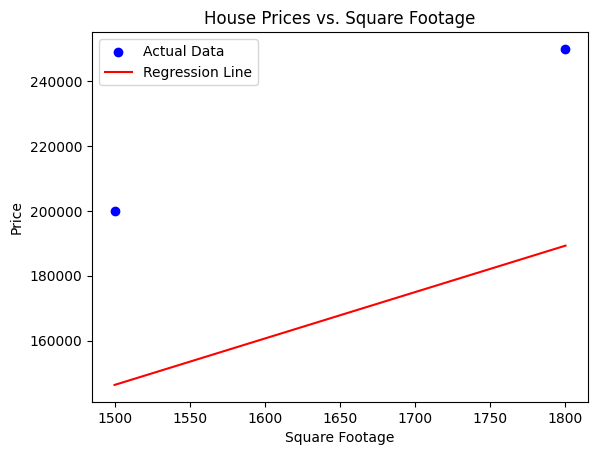

In [25]:
# Plot the data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('House Prices vs. Square Footage')
plt.legend()

# Show the plot
plt.show()

### Logistic simple example

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [43]:
# Sample dataset: Study hours and whether students passed or failed
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head(10))

   StudyHours  Pass
0           1     0
1           2     0
2           3     0
3           4     0
4           5     0
5           6     1
6           7     1
7           8     1
8           9     1
9          10     1


In [44]:
# Features (X) and Target (y)
X = df[['StudyHours']]  # Feature(s)
y = df['Pass']          # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (8, 1), (8,)
Testing data: (2, 1), (2,)


In [45]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display the model's learned coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: [-6.28495636]
Coefficient: [1.14270903]


In [46]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Display the predictions
print("Predicted Outcomes (Pass/Fail):", y_pred)
print("Actual Outcomes:", y_test.values)

Predicted Outcomes (Pass/Fail): [1 0]
Actual Outcomes: [1 0]


In [47]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


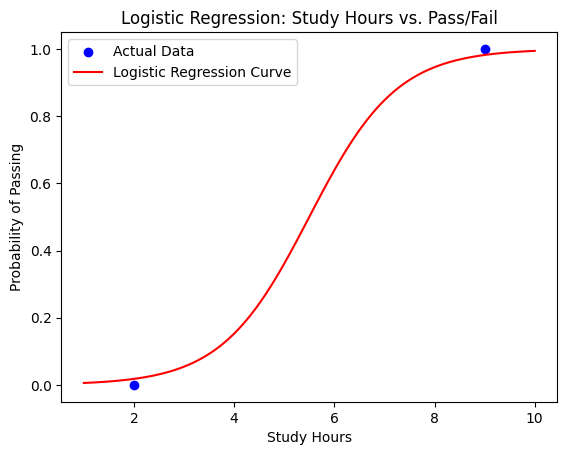

In [48]:
# Create a range of study hours for plotting
study_hours_range = np.linspace(X.min(), X.max(), 100)

# Calculate predicted probabilities using the sigmoid function
y_prob = model.predict_proba(study_hours_range.reshape(-1, 1))[:, 1]

# Plot the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the logistic regression curve
plt.plot(study_hours_range, y_prob, color='red', label='Logistic Regression Curve')

# Add labels and title
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Study Hours vs. Pass/Fail')
plt.legend()

# Show the plot
plt.show()

### Practice activity: Implementing decision trees

In [49]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [140]:
# Sample dataset: Study hours, previous exam scores, and pass/fail labels
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 4, 1, 2, 8, 5, 9],
    'PrevExamScore': [30, 40, 45, 50, 60, 15, 70, 75, 80, 85, 45, 80, 60, 60, 40, 65, 20],
    'Pass': [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head(15))

    StudyHours  PrevExamScore  Pass
0            1             30     0
1            2             40     0
2            3             45     0
3            4             50     0
4            5             60     1
5            6             15     0
6            7             70     1
7            8             75     1
8            9             80     1
9           10             85     1
10           3             45     0
11           4             80     1
12           1             60     0
13           2             60     0
14           8             40     1


In [154]:
# Features (X) and Target (y)
X = df[['StudyHours', 'PrevExamScore']]  # Features
y = df['Pass']                           # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Display the shape of the training and testing sets
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (11, 2), (11,)
Testing data: (6, 2), (6,)


In [155]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train,)

# Display the model's parameters
print(f"Tree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")

Tree depth: 4
Number of leaves: 5


In [156]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Display the predictions
print("Predicted Outcomes (Pass/Fail):", y_pred)
print("Actual Outcomes:", y_test.values)

Predicted Outcomes (Pass/Fail): [0 1 0 1 1 1]
Actual Outcomes: [0 1 0 1 1 1]


In [157]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[2 0]
 [0 4]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



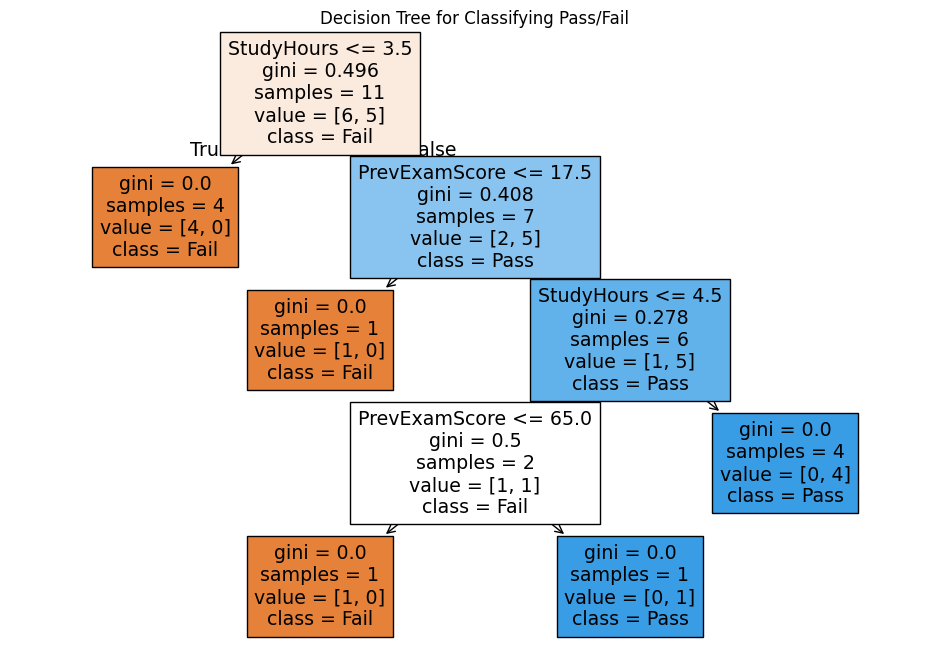

In [158]:
# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(model, feature_names=['StudyHours', 'PrevExamScore'], class_names=['Fail', 'Pass'], filled=True)
plt.title('Decision Tree for Classifying Pass/Fail')
plt.show()

In [159]:
# Limit the tree depth to avoid overfitting
model_tuned = DecisionTreeClassifier(max_depth=3)

# Train the model on the training data
model_tuned.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_tuned = model_tuned.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy (Tuned Model): {accuracy_tuned}")

Accuracy (Tuned Model): 1.0


## Practice activity: Implementing and comparing models

In [161]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [182]:
# Sample dataset: Study hours, previous exam scores, and pass/fail labels
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 4, 1, 2, 8, 5, 9],
    'PrevExamScore': [30, 40, 45, 50, 60, 15, 70, 75, 80, 85, 45, 80, 60, 60, 40, 65, 20],
    'Pass': [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head(20))

    StudyHours  PrevExamScore  Pass
0            1             30     0
1            2             40     0
2            3             45     0
3            4             50     0
4            5             60     1
5            6             15     0
6            7             70     1
7            8             75     1
8            9             80     1
9           10             85     1
10           3             45     0
11           4             80     1
12           1             60     0
13           2             60     0
14           8             40     1
15           5             65     1
16           9             20     1


In [183]:
# Features (X) and Target (y)
X = df[['StudyHours', 'PrevExamScore']]  # Features
y = df['Pass']  # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (13, 2), (13,)
Testing data: (4, 2), (4,)


In [184]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the Logistic Regression model
logreg_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

Logistic Regression Accuracy: 1.0


In [185]:
# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier()

# Train the Decision Tree model
tree_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree}")

Decision Tree Accuracy: 0.75


In [186]:
# Evaluate Logistic Regression
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Evaluate Decision Tree
print("Decision Tree:")
print(f"Accuracy: {accuracy_tree}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Decision Tree:
Accuracy: 0.75
Confusion Matrix:
[[0 1]
 [0 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classi

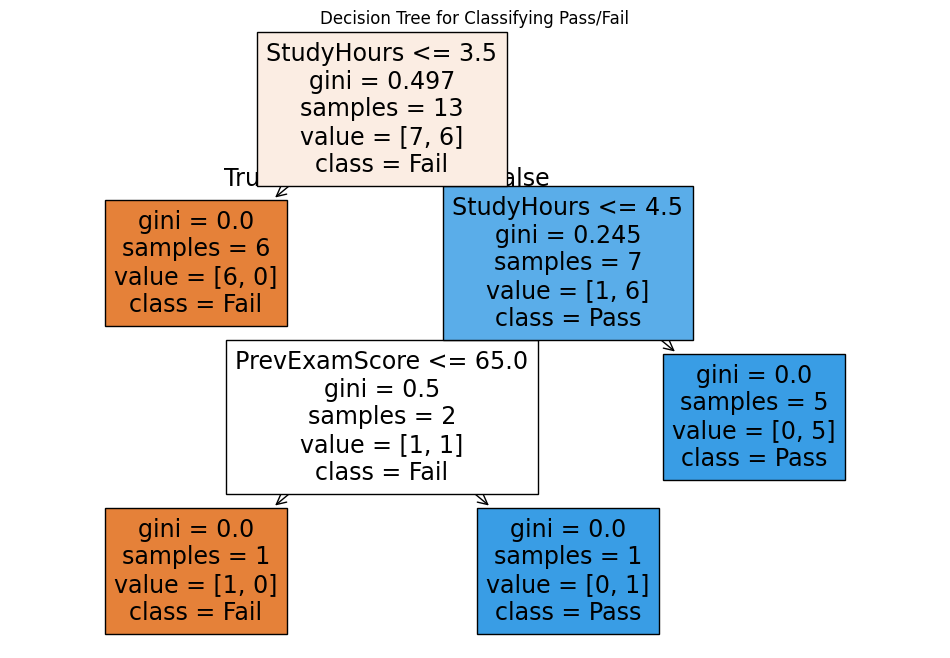

In [187]:
# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(tree_model, feature_names=['StudyHours', 'PrevExamScore'], class_names=['Fail', 'Pass'], filled=True)
plt.title('Decision Tree for Classifying Pass/Fail')
plt.show()

### Practice activity: Applying metrics and cross-validation

In [193]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score

In [197]:
# Sample dataset: Study hours, previous exam scores, and pass/fail labels
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 4, 1, 2, 8, 5, 9],
    'PrevExamScore': [30, 40, 45, 50, 60, 15, 70, 75, 80, 85, 45, 80, 60, 60, 40, 65, 20],
    'Pass': [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)

# Features and target variable
X = df[['StudyHours', 'PrevExamScore']]
y = df['Pass']

In [200]:
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [201]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [207]:
from sklearn.model_selection import cross_val_score

# Initialize the model
model = LogisticRegression()

# Perform 5-fold cross-validation and calculate accuracy for each fold
cv_scores = cross_val_score(model, X, y, cv=3, scoring='accuracy')

# Display the accuracy for each fold and the mean accuracy
print(f'Cross-validation accuracies: {cv_scores}')
print(f'Mean cross-validation accuracy: {np.mean(cv_scores)}')

Cross-validation accuracies: [1.  1.  0.2]
Mean cross-validation accuracy: 0.7333333333333334


In [209]:
from sklearn.model_selection import cross_validate

# Define multiple scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation
cv_results = cross_validate(model, X, y, cv=3, scoring=scoring)

# Print results for each metric
print(f"Cross-validation Accuracy: {np.mean(cv_results['test_accuracy'])}")
print(f"Cross-validation Precision: {np.mean(cv_results['test_precision'])}")
print(f"Cross-validation Recall: {np.mean(cv_results['test_recall'])}")
print(f"Cross-validation F1-Score: {np.mean(cv_results['test_f1'])}")

Cross-validation Accuracy: 0.7333333333333334
Cross-validation Precision: 0.7777777777777778
Cross-validation Recall: 0.7777777777777778
Cross-validation F1-Score: 0.7777777777777778


In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Sample dataset for regression
X_reg = df[['StudyHours']]
y_reg = df['PrevExamScore']

# Initialize a linear regression model
reg_model = LinearRegression()

# Perform 5-fold cross-validation using R-squared as the metric
cv_scores_r2 = cross_val_score(reg_model, X_reg, y_reg, cv=3, scoring='r2')

print(f'Cross-validation R-squared scores: {cv_scores_r2}')
print(f'Mean R-squared score: {np.mean(cv_scores_r2)}')

Cross-validation R-squared scores: [-2.08182513 -8.10595865 -2.67883308]
Mean R-squared score: -4.288872288044371


In [216]:
import statsmodels.api as sm

# Sample data: X is the feature matrix, y is the target variable
X = sm.add_constant(X)  # Add a constant (intercept) to the model
model = sm.OLS(y, X).fit()  # Fit an Ordinary Least Squares regression
print(model.summary())  # Display the model summary

                            OLS Regression Results                            
=
Dep. Variable:                   Pass   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     17.30
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           0.000165
Time:                        14:40:48   Log-Likelihood:                -1.7306
No. Observations:                  17   AIC:                             9.461
Df Residuals:                      14   BIC:                             11.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5349      0.220    

C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


### Lasso for feature selection

In [238]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso model with alpha (λ) as the regularization parameter
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Display the coefficients of the features
print("Selected features:", lasso_model.feature_names_in_)
print(f"Lasso Coefficients: {lasso_model.coef_}")

Selected features: ['StudyHours' 'PrevExamScore']
Lasso Coefficients: [0.13204138 0.00512711]


In [239]:
# Try different alpha values and compare the results
for alpha in [0.01, 0.05, 0.1, 0.5, 1.0]:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'Alpha: {alpha}, R-squared score: {r2}, Coefficients: {lasso_model.coef_}')

Alpha: 0.01, R-squared score: 0.45909399075353075, Coefficients: [0.13204138 0.00512711]
Alpha: 0.05, R-squared score: 0.47005172956668806, Coefficients: [0.12727734 0.00512379]
Alpha: 0.1, R-squared score: 0.48075661488153, Coefficients: [0.12132229 0.00511963]
Alpha: 0.5, R-squared score: 0.44670416933606605, Coefficients: [0.07368189 0.00508636]
Alpha: 1.0, R-squared score: 0.10490940556170714, Coefficients: [0.01413131 0.00504478]


### Practice activity: Implementing backward elimination

In [225]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [226]:
# Sample dataset
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 4, 1, 2, 8, 5, 9],
    'PrevExamScore': [30, 40, 45, 50, 60, 15, 70, 75, 80, 85, 45, 80, 60, 60, 40, 65, 20],
    'Pass': [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)

# Features and target variable
X = df[['StudyHours', 'PrevExamScore']]
y = df['Pass']

In [227]:
# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

In [229]:
# Fit the model using Ordinary Least Squares (OLS) regression
model = sm.OLS(y, X).fit()

# Display the summary, including p-values for each feature
print(model.summary())

                            OLS Regression Results                            
=
Dep. Variable:                   Pass   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     17.30
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           0.000165
Time:                        15:25:42   Log-Likelihood:                -1.7306
No. Observations:                  17   AIC:                             9.461
Df Residuals:                      14   BIC:                             11.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5349      0.220    

C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [230]:
# Define a significance level
significance_level = 0.05

# Perform backward elimination
while True:
    # Fit the model
    model = sm.OLS(y, X).fit()
    # Get the highest p-value in the model
    max_p_value = model.pvalues.max()
    
    # Check if the highest p-value is greater than the significance level
    if max_p_value > significance_level:
        # Identify the feature with the highest p-value
        feature_to_remove = model.pvalues.idxmax()
        print(f"Removing feature: {feature_to_remove} with p-value: {max_p_value}")
        
        # Drop the feature
        X = X.drop(columns=[feature_to_remove])
    else:
        break

# Display the final model summary
print(model.summary())

                            OLS Regression Results                            
=
Dep. Variable:                   Pass   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     17.30
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           0.000165
Time:                        15:31:05   Log-Likelihood:                -1.7306
No. Observations:                  17   AIC:                             9.461
Df Residuals:                      14   BIC:                             11.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5349      0.220    

C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


### Practice activity: Implementing forward selection

In [234]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [235]:
# Sample dataset: Study hours, previous exam scores, and pass/fail labels
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 4, 1, 2, 8, 5, 9],
    'PrevExamScore': [30, 40, 45, 50, 60, 15, 70, 75, 80, 85, 45, 80, 60, 60, 40, 65, 20],
    'Pass': [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)

# Features and target variable
X = df[['StudyHours', 'PrevExamScore']]
y = df['Pass']

In [240]:
def forward_selection(X, y):
    remaining_features = set(X.columns)
    selected_features = []
    current_score = 0.0
    best_score = 0.0
    
    while remaining_features:
        scores_with_candidates = []
        
        # Loop through remaining features
        for feature in remaining_features:
            features_to_test = selected_features + [feature]
            X_train, X_test, y_train, y_test = train_test_split(X[features_to_test], y, test_size=0.2, random_state=42)
            
            # Train the model
            model = LinearRegression()
            model.fit(X_train, y_train)
            
            # Make predictions and calculate R-squared
            y_pred = model.predict(X_test)
            score = r2_score(y_test, y_pred)
            
            # Record the score with the current feature
            scores_with_candidates.append((score, feature))
        
        # Sort candidates by score (highest score first)
        scores_with_candidates.sort(reverse=True)
        best_score, best_feature = scores_with_candidates[0]
        
        # If adding the feature improves the score, add it to the model
        if current_score < best_score:
            remaining_features.remove(best_feature)
            selected_features.append(best_feature)
            current_score = best_score
        else:
            break
    
    return selected_features

# Run forward selection
best_features = forward_selection(X, y)
print("Selected features using Forward Selection:", best_features)

Selected features using Forward Selection: ['PrevExamScore', 'StudyHours']


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [43]:
# Sample dataset: Study hours and whether students passed or failed
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head(10))

   StudyHours  Pass
0           1     0
1           2     0
2           3     0
3           4     0
4           5     0
5           6     1
6           7     1
7           8     1
8           9     1
9          10     1


In [44]:
# Features (X) and Target (y)
X = df[['StudyHours']]  # Feature(s)
y = df['Pass']          # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (8, 1), (8,)
Testing data: (2, 1), (2,)


In [45]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display the model's learned coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: [-6.28495636]
Coefficient: [1.14270903]


In [46]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Display the predictions
print("Predicted Outcomes (Pass/Fail):", y_pred)
print("Actual Outcomes:", y_test.values)

Predicted Outcomes (Pass/Fail): [1 0]
Actual Outcomes: [1 0]


In [47]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


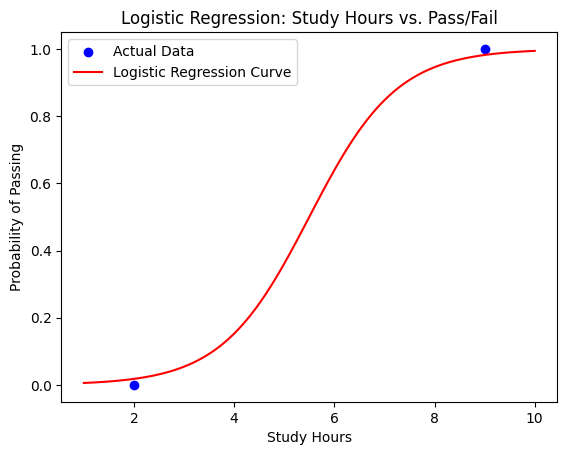

In [48]:
# Create a range of study hours for plotting
study_hours_range = np.linspace(X.min(), X.max(), 100)

# Calculate predicted probabilities using the sigmoid function
y_prob = model.predict_proba(study_hours_range.reshape(-1, 1))[:, 1]

# Plot the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the logistic regression curve
plt.plot(study_hours_range, y_prob, color='red', label='Logistic Regression Curve')

# Add labels and title
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Study Hours vs. Pass/Fail')
plt.legend()

# Show the plot
plt.show()

### Practice activity: Implementing decision trees

In [49]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [140]:
# Sample dataset: Study hours, previous exam scores, and pass/fail labels
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 4, 1, 2, 8, 5, 9],
    'PrevExamScore': [30, 40, 45, 50, 60, 15, 70, 75, 80, 85, 45, 80, 60, 60, 40, 65, 20],
    'Pass': [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head(15))

    StudyHours  PrevExamScore  Pass
0            1             30     0
1            2             40     0
2            3             45     0
3            4             50     0
4            5             60     1
5            6             15     0
6            7             70     1
7            8             75     1
8            9             80     1
9           10             85     1
10           3             45     0
11           4             80     1
12           1             60     0
13           2             60     0
14           8             40     1


In [154]:
# Features (X) and Target (y)
X = df[['StudyHours', 'PrevExamScore']]  # Features
y = df['Pass']                           # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Display the shape of the training and testing sets
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (11, 2), (11,)
Testing data: (6, 2), (6,)


In [155]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train,)

# Display the model's parameters
print(f"Tree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")

Tree depth: 4
Number of leaves: 5


In [156]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Display the predictions
print("Predicted Outcomes (Pass/Fail):", y_pred)
print("Actual Outcomes:", y_test.values)

Predicted Outcomes (Pass/Fail): [0 1 0 1 1 1]
Actual Outcomes: [0 1 0 1 1 1]


In [157]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[2 0]
 [0 4]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



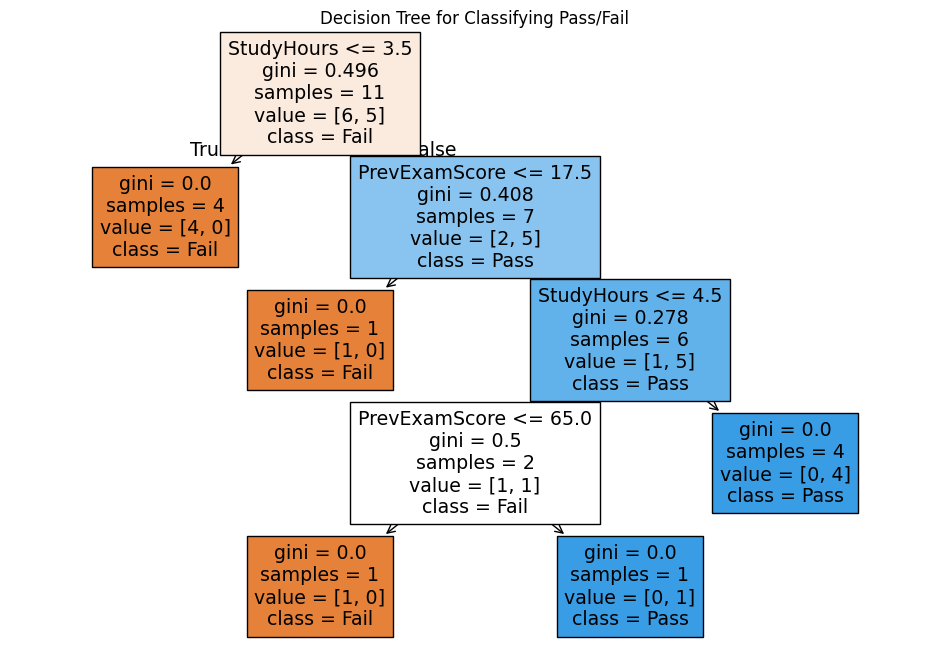

In [158]:
# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(model, feature_names=['StudyHours', 'PrevExamScore'], class_names=['Fail', 'Pass'], filled=True)
plt.title('Decision Tree for Classifying Pass/Fail')
plt.show()

In [159]:
# Limit the tree depth to avoid overfitting
model_tuned = DecisionTreeClassifier(max_depth=3)

# Train the model on the training data
model_tuned.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_tuned = model_tuned.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy (Tuned Model): {accuracy_tuned}")

Accuracy (Tuned Model): 1.0


## Practice activity: Implementing and comparing models

In [161]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [182]:
# Sample dataset: Study hours, previous exam scores, and pass/fail labels
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 4, 1, 2, 8, 5, 9],
    'PrevExamScore': [30, 40, 45, 50, 60, 15, 70, 75, 80, 85, 45, 80, 60, 60, 40, 65, 20],
    'Pass': [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head(20))

    StudyHours  PrevExamScore  Pass
0            1             30     0
1            2             40     0
2            3             45     0
3            4             50     0
4            5             60     1
5            6             15     0
6            7             70     1
7            8             75     1
8            9             80     1
9           10             85     1
10           3             45     0
11           4             80     1
12           1             60     0
13           2             60     0
14           8             40     1
15           5             65     1
16           9             20     1


In [183]:
# Features (X) and Target (y)
X = df[['StudyHours', 'PrevExamScore']]  # Features
y = df['Pass']  # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (13, 2), (13,)
Testing data: (4, 2), (4,)


In [184]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the Logistic Regression model
logreg_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

Logistic Regression Accuracy: 1.0


In [185]:
# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier()

# Train the Decision Tree model
tree_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree}")

Decision Tree Accuracy: 0.75


In [186]:
# Evaluate Logistic Regression
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Evaluate Decision Tree
print("Decision Tree:")
print(f"Accuracy: {accuracy_tree}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Decision Tree:
Accuracy: 0.75
Confusion Matrix:
[[0 1]
 [0 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classi

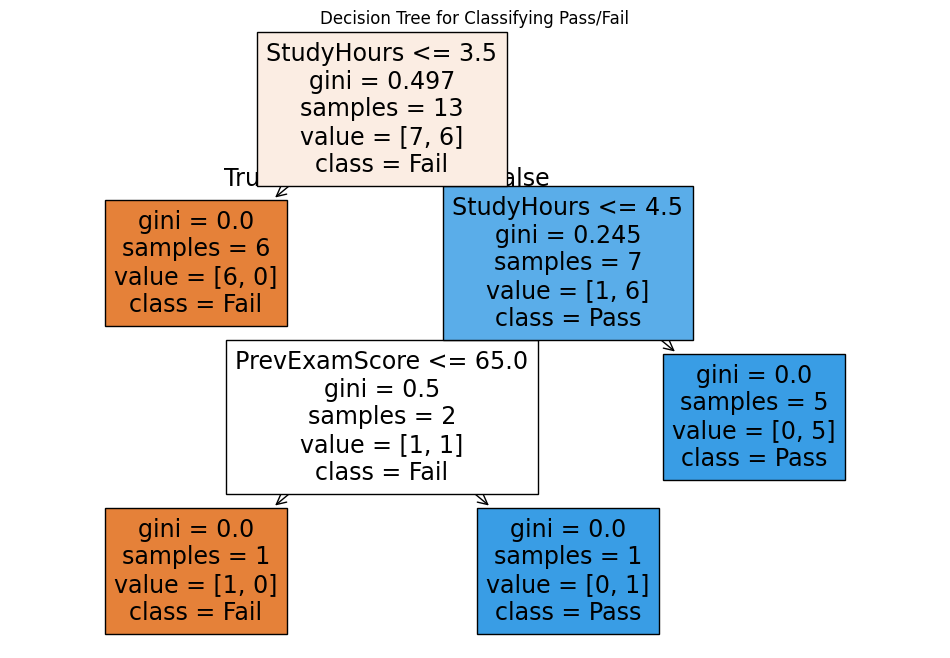

In [187]:
# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(tree_model, feature_names=['StudyHours', 'PrevExamScore'], class_names=['Fail', 'Pass'], filled=True)
plt.title('Decision Tree for Classifying Pass/Fail')
plt.show()

### Practice activity: Applying metrics and cross-validation

In [193]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score

In [197]:
# Sample dataset: Study hours, previous exam scores, and pass/fail labels
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 4, 1, 2, 8, 5, 9],
    'PrevExamScore': [30, 40, 45, 50, 60, 15, 70, 75, 80, 85, 45, 80, 60, 60, 40, 65, 20],
    'Pass': [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)

# Features and target variable
X = df[['StudyHours', 'PrevExamScore']]
y = df['Pass']

In [200]:
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [201]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [207]:
from sklearn.model_selection import cross_val_score

# Initialize the model
model = LogisticRegression()

# Perform 5-fold cross-validation and calculate accuracy for each fold
cv_scores = cross_val_score(model, X, y, cv=3, scoring='accuracy')

# Display the accuracy for each fold and the mean accuracy
print(f'Cross-validation accuracies: {cv_scores}')
print(f'Mean cross-validation accuracy: {np.mean(cv_scores)}')

Cross-validation accuracies: [1.  1.  0.2]
Mean cross-validation accuracy: 0.7333333333333334


In [209]:
from sklearn.model_selection import cross_validate

# Define multiple scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation
cv_results = cross_validate(model, X, y, cv=3, scoring=scoring)

# Print results for each metric
print(f"Cross-validation Accuracy: {np.mean(cv_results['test_accuracy'])}")
print(f"Cross-validation Precision: {np.mean(cv_results['test_precision'])}")
print(f"Cross-validation Recall: {np.mean(cv_results['test_recall'])}")
print(f"Cross-validation F1-Score: {np.mean(cv_results['test_f1'])}")

Cross-validation Accuracy: 0.7333333333333334
Cross-validation Precision: 0.7777777777777778
Cross-validation Recall: 0.7777777777777778
Cross-validation F1-Score: 0.7777777777777778


In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Sample dataset for regression
X_reg = df[['StudyHours']]
y_reg = df['PrevExamScore']

# Initialize a linear regression model
reg_model = LinearRegression()

# Perform 5-fold cross-validation using R-squared as the metric
cv_scores_r2 = cross_val_score(reg_model, X_reg, y_reg, cv=3, scoring='r2')

print(f'Cross-validation R-squared scores: {cv_scores_r2}')
print(f'Mean R-squared score: {np.mean(cv_scores_r2)}')

Cross-validation R-squared scores: [-2.08182513 -8.10595865 -2.67883308]
Mean R-squared score: -4.288872288044371


In [216]:
import statsmodels.api as sm

# Sample data: X is the feature matrix, y is the target variable
X = sm.add_constant(X)  # Add a constant (intercept) to the model
model = sm.OLS(y, X).fit()  # Fit an Ordinary Least Squares regression
print(model.summary())  # Display the model summary

                            OLS Regression Results                            
=
Dep. Variable:                   Pass   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     17.30
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           0.000165
Time:                        14:40:48   Log-Likelihood:                -1.7306
No. Observations:                  17   AIC:                             9.461
Df Residuals:                      14   BIC:                             11.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5349      0.220    

C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


### Lasso for feature selection

In [238]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso model with alpha (λ) as the regularization parameter
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Display the coefficients of the features
print("Selected features:", lasso_model.feature_names_in_)
print(f"Lasso Coefficients: {lasso_model.coef_}")

Selected features: ['StudyHours' 'PrevExamScore']
Lasso Coefficients: [0.13204138 0.00512711]


In [239]:
# Try different alpha values and compare the results
for alpha in [0.01, 0.05, 0.1, 0.5, 1.0]:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'Alpha: {alpha}, R-squared score: {r2}, Coefficients: {lasso_model.coef_}')

Alpha: 0.01, R-squared score: 0.45909399075353075, Coefficients: [0.13204138 0.00512711]
Alpha: 0.05, R-squared score: 0.47005172956668806, Coefficients: [0.12727734 0.00512379]
Alpha: 0.1, R-squared score: 0.48075661488153, Coefficients: [0.12132229 0.00511963]
Alpha: 0.5, R-squared score: 0.44670416933606605, Coefficients: [0.07368189 0.00508636]
Alpha: 1.0, R-squared score: 0.10490940556170714, Coefficients: [0.01413131 0.00504478]


### Practice activity: Implementing backward elimination

In [225]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [226]:
# Sample dataset
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 4, 1, 2, 8, 5, 9],
    'PrevExamScore': [30, 40, 45, 50, 60, 15, 70, 75, 80, 85, 45, 80, 60, 60, 40, 65, 20],
    'Pass': [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)

# Features and target variable
X = df[['StudyHours', 'PrevExamScore']]
y = df['Pass']

In [227]:
# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

In [229]:
# Fit the model using Ordinary Least Squares (OLS) regression
model = sm.OLS(y, X).fit()

# Display the summary, including p-values for each feature
print(model.summary())

                            OLS Regression Results                            
=
Dep. Variable:                   Pass   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     17.30
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           0.000165
Time:                        15:25:42   Log-Likelihood:                -1.7306
No. Observations:                  17   AIC:                             9.461
Df Residuals:                      14   BIC:                             11.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5349      0.220    

C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [230]:
# Define a significance level
significance_level = 0.05

# Perform backward elimination
while True:
    # Fit the model
    model = sm.OLS(y, X).fit()
    # Get the highest p-value in the model
    max_p_value = model.pvalues.max()
    
    # Check if the highest p-value is greater than the significance level
    if max_p_value > significance_level:
        # Identify the feature with the highest p-value
        feature_to_remove = model.pvalues.idxmax()
        print(f"Removing feature: {feature_to_remove} with p-value: {max_p_value}")
        
        # Drop the feature
        X = X.drop(columns=[feature_to_remove])
    else:
        break

# Display the final model summary
print(model.summary())

                            OLS Regression Results                            
=
Dep. Variable:                   Pass   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     17.30
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           0.000165
Time:                        15:31:05   Log-Likelihood:                -1.7306
No. Observations:                  17   AIC:                             9.461
Df Residuals:                      14   BIC:                             11.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5349      0.220    

C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


### Practice activity: Implementing forward selection

In [234]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [235]:
# Sample dataset: Study hours, previous exam scores, and pass/fail labels
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 4, 1, 2, 8, 5, 9],
    'PrevExamScore': [30, 40, 45, 50, 60, 15, 70, 75, 80, 85, 45, 80, 60, 60, 40, 65, 20],
    'Pass': [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)

# Features and target variable
X = df[['StudyHours', 'PrevExamScore']]
y = df['Pass']

In [240]:
def forward_selection(X, y):
    remaining_features = set(X.columns)
    selected_features = []
    current_score = 0.0
    best_score = 0.0
    
    while remaining_features:
        scores_with_candidates = []
        
        # Loop through remaining features
        for feature in remaining_features:
            features_to_test = selected_features + [feature]
            X_train, X_test, y_train, y_test = train_test_split(X[features_to_test], y, test_size=0.2, random_state=42)
            
            # Train the model
            model = LinearRegression()
            model.fit(X_train, y_train)
            
            # Make predictions and calculate R-squared
            y_pred = model.predict(X_test)
            score = r2_score(y_test, y_pred)
            
            # Record the score with the current feature
            scores_with_candidates.append((score, feature))
        
        # Sort candidates by score (highest score first)
        scores_with_candidates.sort(reverse=True)
        best_score, best_feature = scores_with_candidates[0]
        
        # If adding the feature improves the score, add it to the model
        if current_score < best_score:
            remaining_features.remove(best_feature)
            selected_features.append(best_feature)
            current_score = best_score
        else:
            break
    
    return selected_features

# Run forward selection
best_features = forward_selection(X, y)
print("Selected features using Forward Selection:", best_features)

Selected features using Forward Selection: ['PrevExamScore', 'StudyHours']


In [243]:
import sklearn
import sklearn.metrics
sklearn.metrics.r2_score(y_test, sklearn.linear_model.Lasso(alpha=0.5).fit(X_train,y_train).predict(X_test))

0.44670416933606605